### B. Model Selection ( SARIMA )

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

In [2]:
# Load dataset

In [3]:
df = pd.read_csv("air-passengers.csv")
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)


ts = df['Passengers']
df.head()


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
# Plot original data

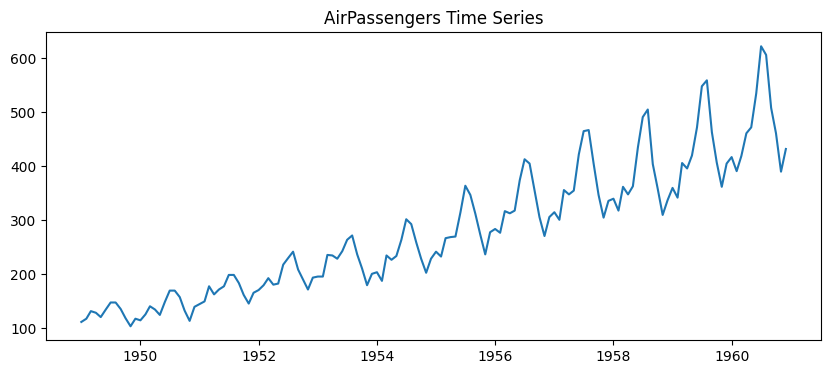

In [5]:
plt.figure(figsize=(10,4))
plt.plot(ts)
plt.title("AirPassengers Time Series")
plt.show()

In [6]:
# ADF Test (stationarity check)

In [7]:
result = adfuller(ts)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: 0.8153688792060467
p-value: 0.991880243437641


In [8]:
# First differencing (remove trend)

In [9]:
ts_diff = ts.diff().dropna()

In [10]:
ts_seasonal_diff = ts_diff.diff(12).dropna()
adf = adfuller(ts_seasonal_diff)
print("ADF:", adf[0])
print("p-value:", adf[1])

ADF: -15.595618083746334
p-value: 1.8565116001234692e-28


<Figure size 1000x400 with 0 Axes>

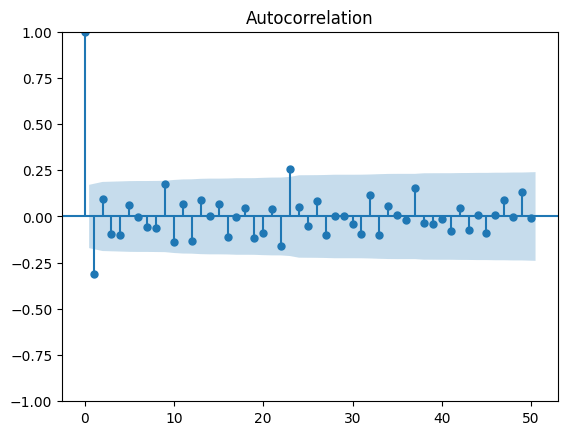

<Figure size 1000x400 with 0 Axes>

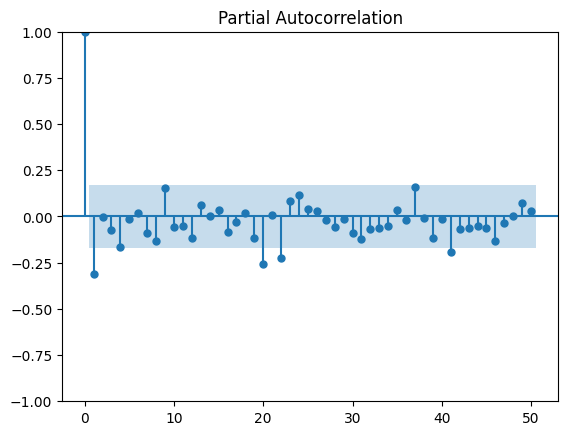

In [11]:
plt.figure(figsize=(10,4))
plot_acf(ts_seasonal_diff, lags=50)
plt.show()

plt.figure(figsize=(10,4))
plot_pacf(ts_seasonal_diff, lags=50)
plt.show()

-- Print SARIMA model

In [12]:
model = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit()

print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -506.149
Date:                            Fri, 12 Dec 2025   AIC                           1022.299
Time:                                    16:24:13   BIC                           1036.675
Sample:                                01-01-1949   HQIC                          1028.140
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1272      0.356     -0.357      0.721      -0.825       0.570
ma.L1         -0.2149      0.325   

/Users/winstonkusumahadi/Documents/SchoolProjects/Final_Data_Mining_Project/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/winstonkusumahadi/Documents/SchoolProjects/Final_Data_Mining_Project/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


### C. Model Evaluation ( SARIMA )

In [13]:
df.head

<bound method NDFrame.head of             Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432

[144 rows x 1 columns]>

In [14]:
df_diff = df['Passengers'].diff().dropna()

Test and Train data

In [15]:
train = ts.iloc[:-12]
test = ts.iloc[-12:]


Build SARIMA model

In [16]:
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit()

/Users/winstonkusumahadi/Documents/SchoolProjects/Final_Data_Mining_Project/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/winstonkusumahadi/Documents/SchoolProjects/Final_Data_Mining_Project/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/winstonkusumahadi/Documents/SchoolProjects/Final_Data_Mining_Project/venv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
forecast = model_fit.forecast(steps=12)

Test MAPE

In [18]:
mape = np.mean(np.abs((test - forecast) / test)) * 100
print("MAPE:", mape)

MAPE: 3.6797592194956152


Print Visualize

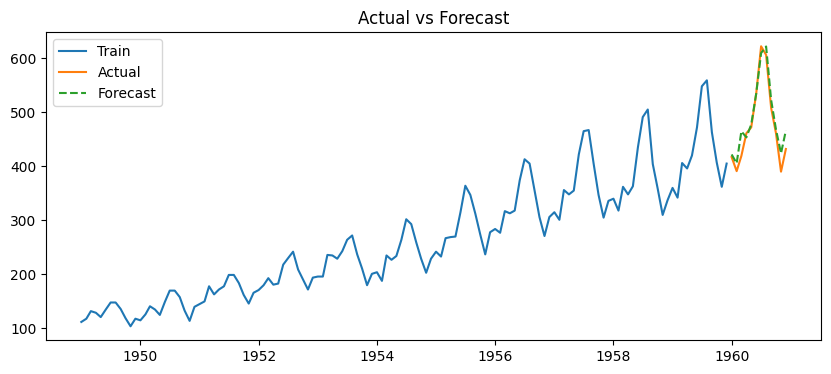

In [19]:
plt.figure(figsize=(10,4))
plt.plot(train, label="Train")
plt.plot(test, label="Actual")
plt.plot(forecast, label="Forecast", linestyle='--')
plt.legend()
plt.title("Actual vs Forecast")
plt.show()

Print Visualize ( Residual , ACF and PCAF )

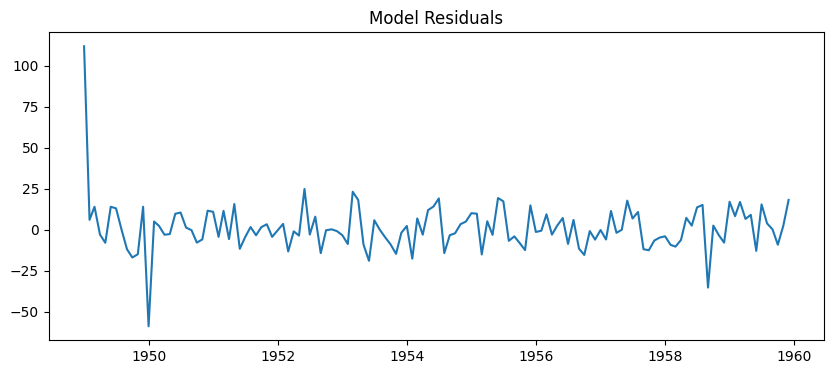

<Figure size 1000x400 with 0 Axes>

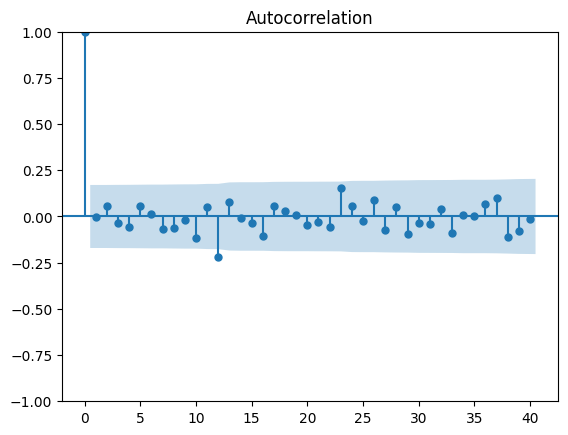

<Figure size 800x400 with 0 Axes>

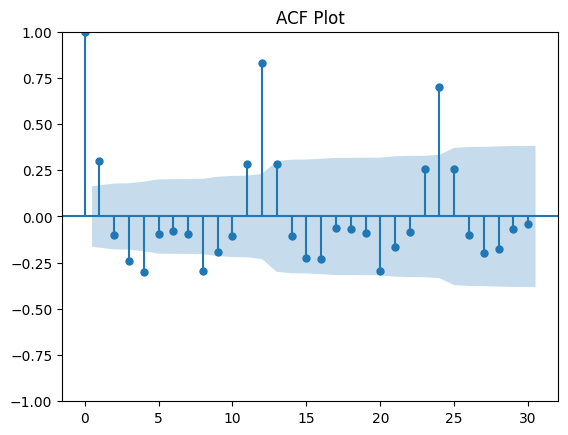

<Figure size 800x400 with 0 Axes>

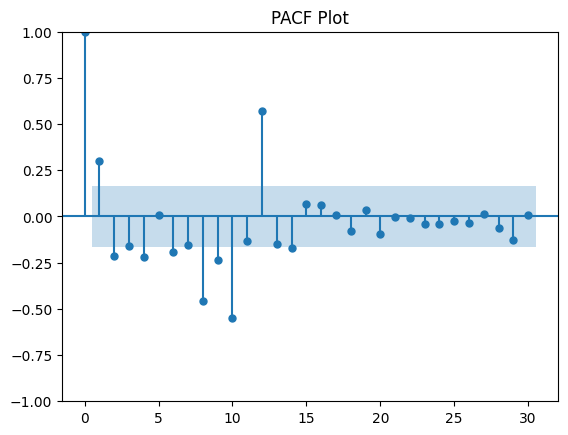

In [20]:
residuals = model_fit.resid

plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title("Model Residuals")
plt.show()

plt.figure(figsize=(10,4))
plot_acf(residuals, lags=40)
plt.show()

plt.figure(figsize=(8,4))
plot_acf(df_diff, lags=30)
plt.title("ACF Plot")
plt.show()

plt.figure(figsize=(8,4))
plot_pacf(df_diff, lags=30)
plt.title("PACF Plot")
plt.show()